In [372]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import warnings
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [373]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [374]:
print("The genres present in the dataset are:")
print(os.listdir("Data/genres_original"))

The genres present in the dataset are:
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [375]:
# Understanding the Audio Files

y, sr = librosa.load("Data/genres_original/blues/blues.00000.wav")

print("Sound Array :", y)
print("Sample Rate (KHz) =", sr)

Sound Array : [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
Sample Rate (KHz) = 22050


In [376]:
# Trimming the Silence sequences sandwiching the audio file

y, _ = librosa.effects.trim(y)
print("After trimming the silence sequences the sound array is:")
print(y)

# Observe no preceeding or succeding silence

After trimming the silence sequences the sound array is:
[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]


Text(0.5, 1.0, 'Waveform in Blues 0')

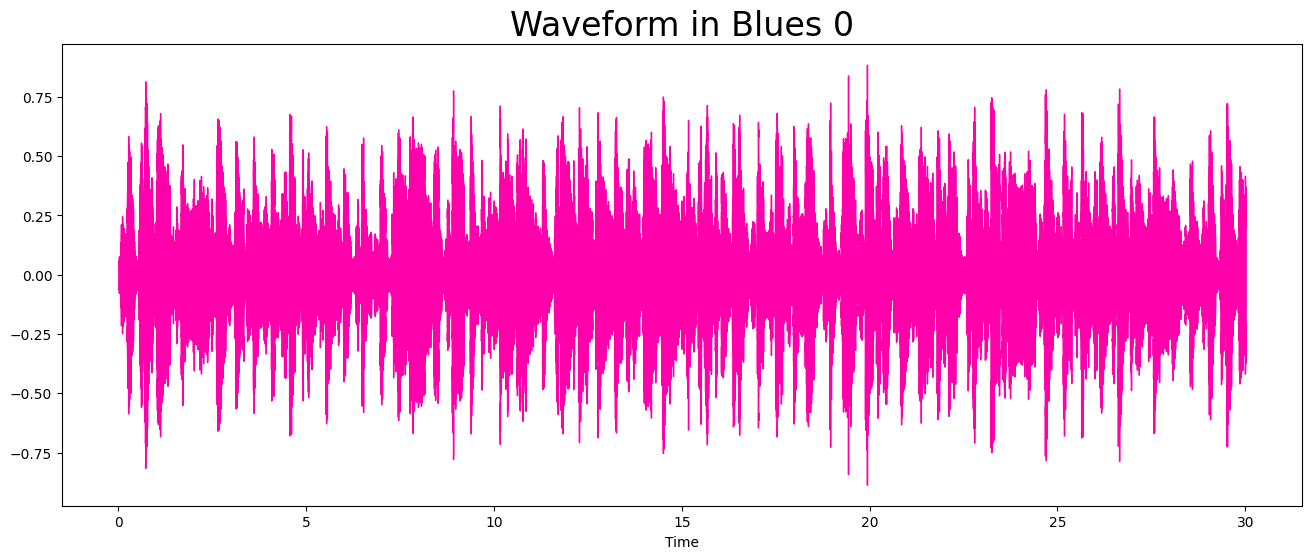

In [377]:
# 2D Representation using Waveform

plt.figure(figsize = (16,6))
librosa.display.waveshow(y = y, sr = sr, color = "#FF00AB");
plt.title("Waveform in Blues 0", fontsize = 24)

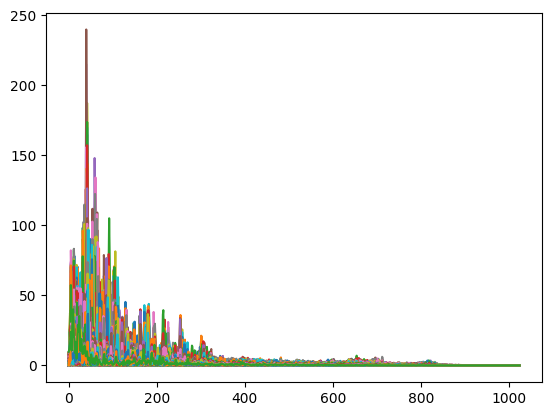

In [378]:
# Decomposing the waveform based on the frequencies using FFT

n_fft = 2048
hop_length = 512

D = np.abs(librosa.stft(y, n_fft = n_fft, hop_length = hop_length))

plt.plot(D)
plt.show()

Text(0.5, 1.0, 'Log Frequency Spectrogram')

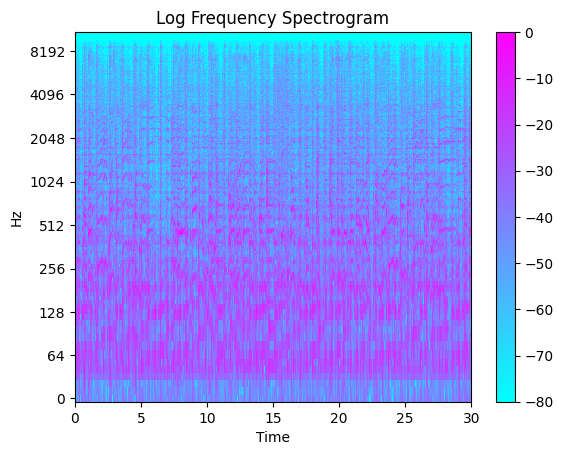

In [379]:
# Creating Log Frequency Spectogram from the FFT Signal
# This also scales to the decibel system, as that is also log based.

Deci = librosa.amplitude_to_db(D, ref = np.max)
librosa.display.specshow(Deci, sr = sr, hop_length=hop_length, x_axis='time',y_axis='log',cmap = 'cool')

plt.colorbar()
plt.title("Log Frequency Spectrogram")

Text(0.5, 1.0, 'Mel Spectrogram')

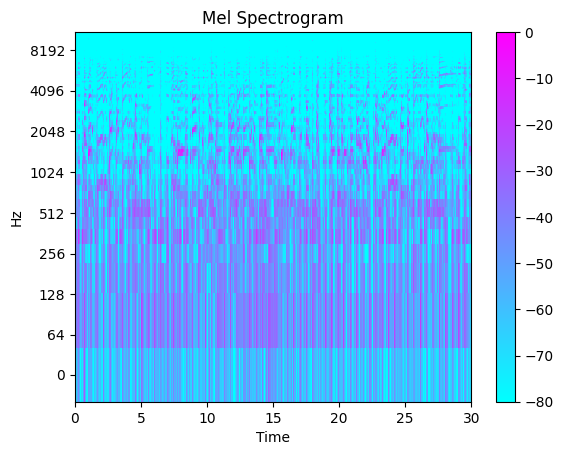

In [380]:
# Mel Spectrogram form the data

Mel_S = librosa.feature.melspectrogram(y =y, sr= sr)
Deci_S = librosa.amplitude_to_db(Mel_S, ref = np.max)
librosa.display.specshow(Deci_S, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool')
plt.colorbar()
plt.title("Mel Spectrogram", fontsize = 12)

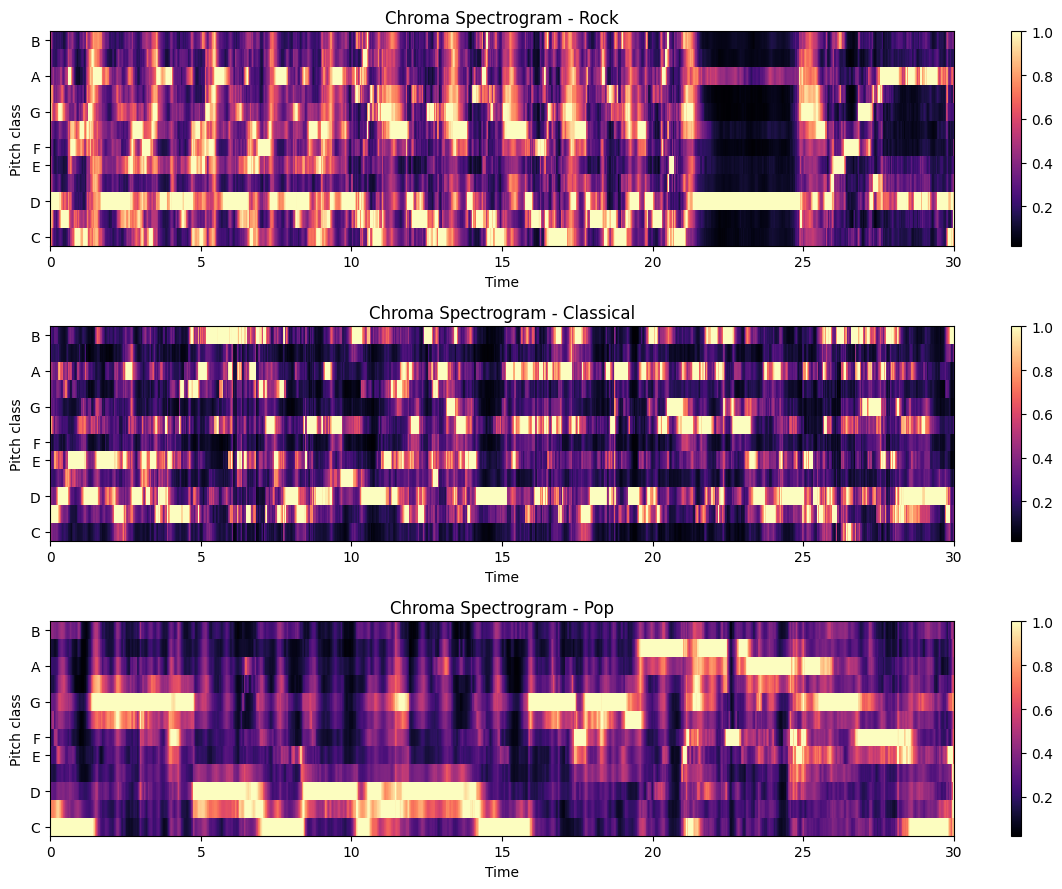

In [381]:
# Chroma Spectogram
# This represents the energy distribution across pitch classes
# Lets compare 3 genres, Rock, Pop and Classical

rock, r_sr = librosa.load("Data/genres_original/rock/rock.00000.wav")
classical, c_sr = librosa.load("Data/genres_original/classical/classical.00000.wav")
pop, p_sr = librosa.load("Data/genres_original/pop/pop.00000.wav")

# Compute chroma spectrograms for each genre
chroma_rock = librosa.feature.chroma_cqt(y=rock, sr=r_sr)
chroma_cls = librosa.feature.chroma_cqt(y=classical, sr=c_sr)
chroma_pop = librosa.feature.chroma_cqt(y=pop, sr=p_sr)

# Plot the chroma spectrograms for each genre
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
librosa.display.specshow(chroma_rock, sr=r_sr, x_axis='time', y_axis='chroma')
plt.title('Chroma Spectrogram - Rock')
plt.colorbar()
plt.tight_layout()

plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_cls, sr=c_sr, x_axis='time', y_axis='chroma')
plt.title('Chroma Spectrogram - Classical')
plt.colorbar()
plt.tight_layout()

plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_pop, sr=p_sr, x_axis='time', y_axis='chroma')
plt.title('Chroma Spectrogram - Pop')
plt.colorbar()
plt.tight_layout()

plt.show()

As can be seen through the chroma spectogram, the Rock and Classical Music seem to have the melodies consisting to a lot of notes at the same time, while the pop music(for general audience) consist very few notes at the same instant.
Even if multiple notes are present at same time in Pop, they are usually harmonies i.e. 3rd or 5th of the root note.

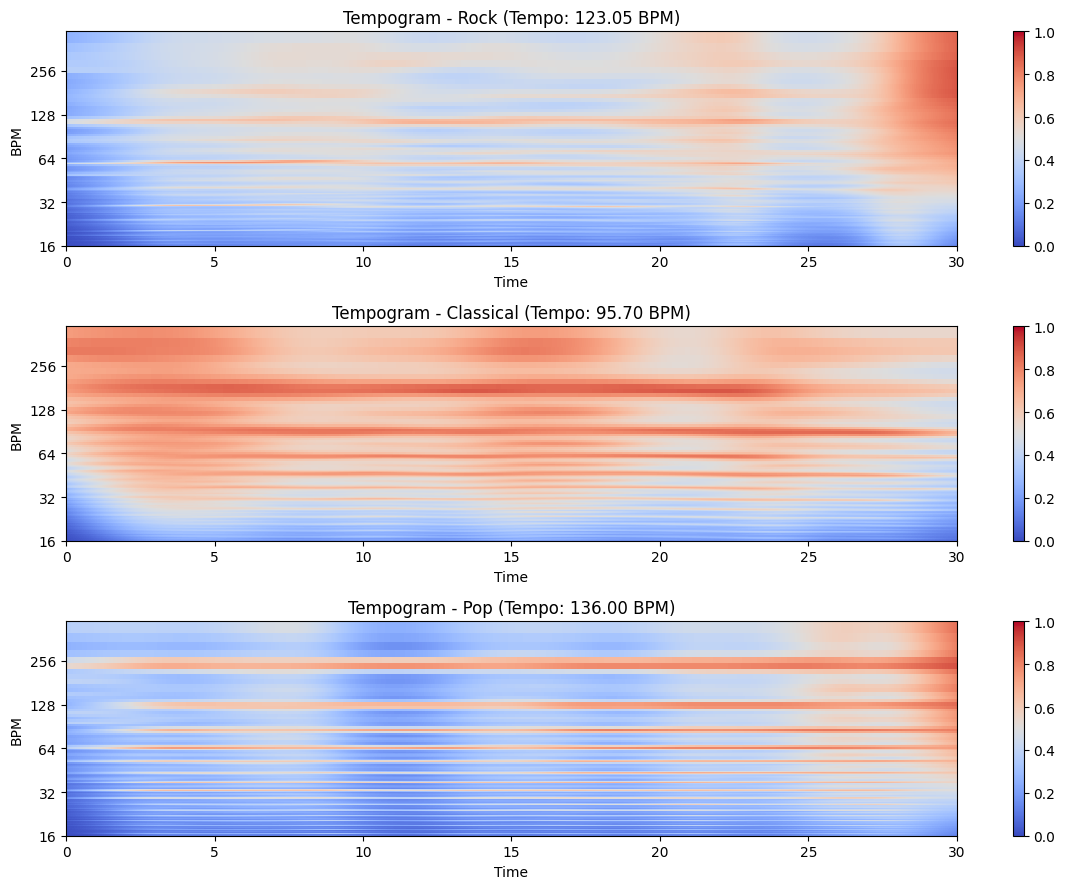

In [382]:
# Compute tempograms for each genre
tempo_rock= librosa.beat.tempo(y=rock, sr=r_sr)
tempogram_rock = librosa.feature.tempogram(y=rock, sr=r_sr, hop_length=512, win_length=384, window=np.hanning)

tempo_cls = librosa.beat.tempo(y=classical, sr=c_sr)
tempogram_cls = librosa.feature.tempogram(y=classical, sr=c_sr, hop_length=512, win_length=384, window=np.hanning)

tempo_pop = librosa.beat.tempo(y=pop, sr=p_sr)
tempogram_pop = librosa.feature.tempogram(y=pop, sr=p_sr, hop_length=512, win_length=384, window=np.hanning)

# Plot the tempograms for each genre
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
librosa.display.specshow(tempogram_rock, sr=r_sr, hop_length=512, x_axis='time', y_axis='tempo')
plt.title('Tempogram - Rock (Tempo: {:.2f} BPM)'.format(tempo_rock[0]))
plt.colorbar()
plt.tight_layout()

plt.subplot(3, 1, 2)
librosa.display.specshow(tempogram_cls, sr=c_sr, hop_length=512, x_axis='time', y_axis='tempo')
plt.title('Tempogram - Classical (Tempo: {:.2f} BPM)'.format(tempo_cls[0]))
plt.colorbar()
plt.tight_layout()

plt.subplot(3, 1, 3)
librosa.display.specshow(tempogram_pop, sr=p_sr, hop_length=512, x_axis='time', y_axis='tempo')
plt.title('Tempogram - Pop (Tempo: {:.2f} BPM)'.format(tempo_pop[0]))
plt.colorbar()
plt.tight_layout()

plt.show()

Not much can be said able the genres with just looking at the tempograms, 
so let's overlay the tempogram with the CQT spectogram, which provides the pitch over time for the audio file.

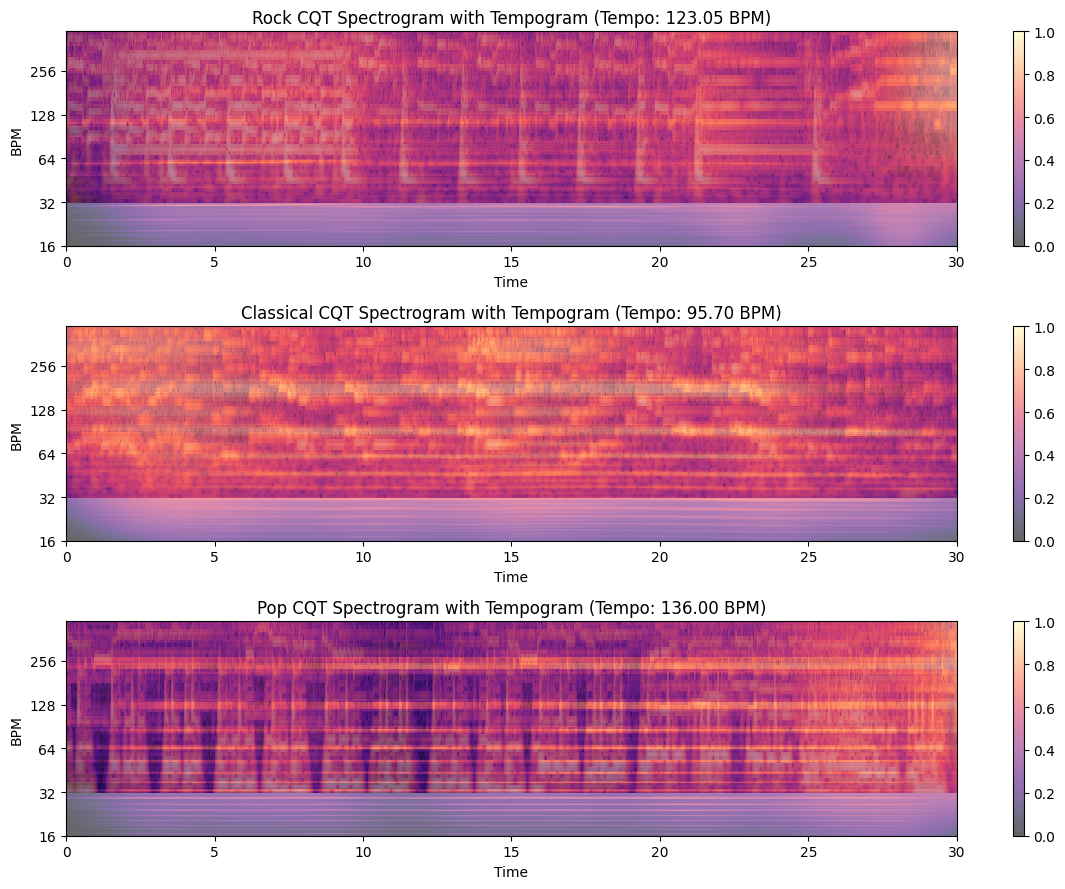

In [383]:
# Compute CQT spectrograms for each genre
cqt_rock = np.abs(librosa.cqt(rock, sr=r_sr, hop_length=512))
cqt_cls = np.abs(librosa.cqt(classical, sr=c_sr, hop_length=512))
cqt_pop = np.abs(librosa.cqt(pop, sr=p_sr, hop_length=512))

# cqt_rock = sklearn.preprocessing.scale(cqt_rock, axis=1)
# cqt_cls = sklearn.preprocessing.scale(cqt_cls, axis=1)
# cqt_pop = sklearn.preprocessing.scale(cqt_pop, axis=1)
# Plot the CQT spectrograms with tempograms overlaid for each genre
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(cqt_rock, ref=np.max), sr=r_sr, hop_length=512, x_axis='time', y_axis='cqt_note')
librosa.display.specshow(tempogram_rock, sr=r_sr, hop_length=512, x_axis='time', y_axis='tempo', cmap='magma', alpha=0.6)
plt.title('Rock CQT Spectrogram with Tempogram (Tempo: {:.2f} BPM)'.format(tempo_rock[0]))
plt.colorbar()
plt.tight_layout()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(cqt_cls, ref=np.max), sr=c_sr, hop_length=512, x_axis='time', y_axis='cqt_note')
librosa.display.specshow(tempogram_cls, sr=c_sr, hop_length=512, x_axis='time', y_axis='tempo', cmap='magma', alpha=0.6)
plt.title('Classical CQT Spectrogram with Tempogram (Tempo: {:.2f} BPM)'.format(tempo_cls[0]))
plt.colorbar()
plt.tight_layout()

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(cqt_pop, ref=np.max), sr=p_sr, hop_length=512, x_axis='time', y_axis='cqt_note')
librosa.display.specshow(tempogram_pop, sr=p_sr, hop_length=512, x_axis='time', y_axis='tempo', cmap='magma', alpha=0.6)
plt.title('Pop CQT Spectrogram with Tempogram (Tempo: {:.2f} BPM)'.format(tempo_pop[0]))
plt.colorbar()
plt.tight_layout()

plt.show()


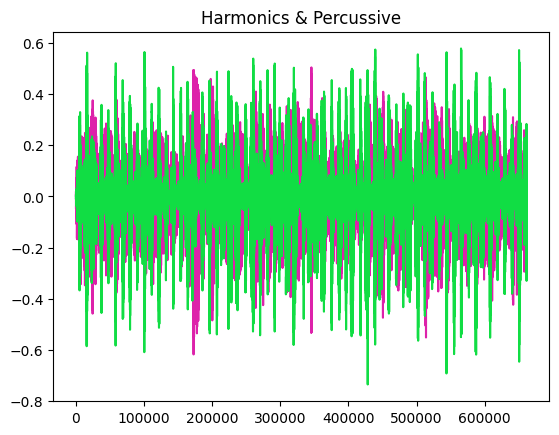

In [384]:
# Harmonics and Percussive for the Audio file

y_harm, y_perc = librosa.effects.hpss(y)
plt.plot(y_harm, color = '#DD22AA')
plt.plot(y_perc, color = '#11DD44')
plt.title("Harmonics & Percussive")
plt.show()

In [385]:
data = pd.read_csv("Data/features_3_sec.csv")
print(data.shape)

(9990, 60)


In [386]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [387]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [388]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


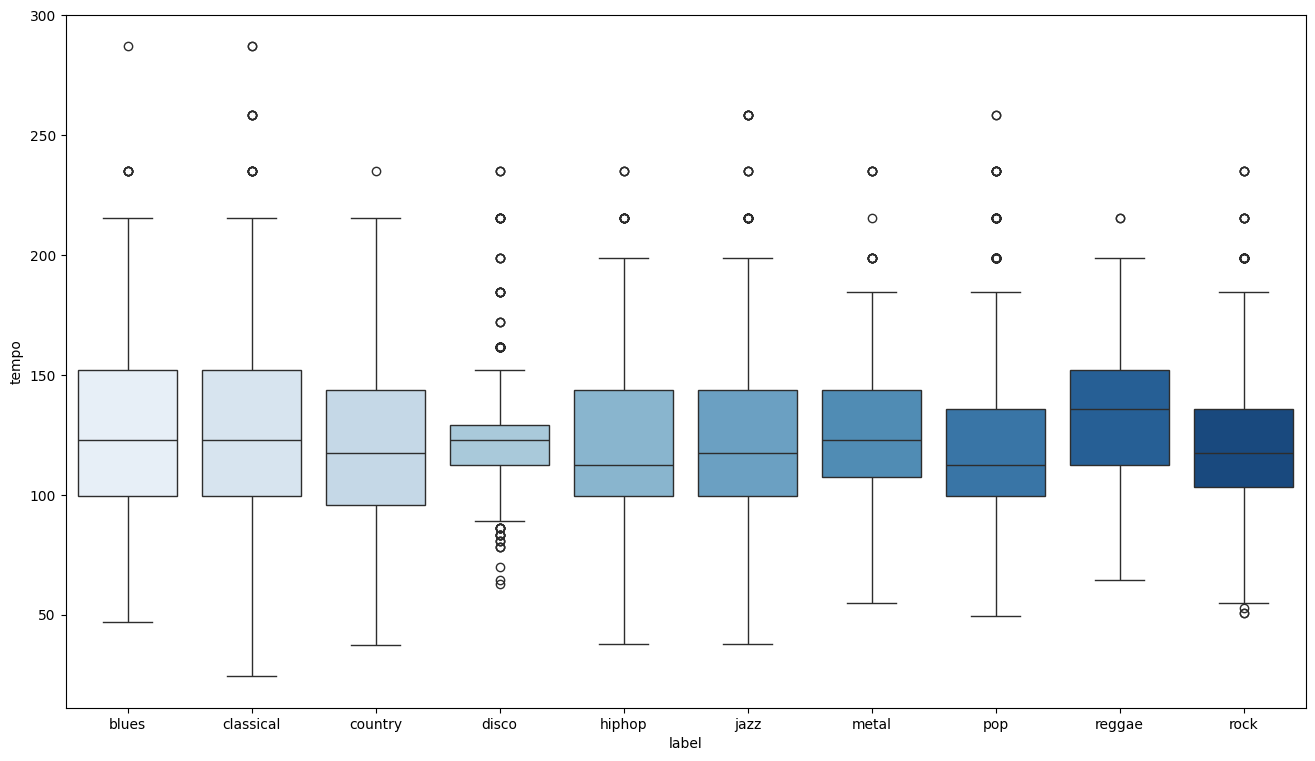

In [389]:
# Box plot of label vs tempo
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'Blues')

plt.show()

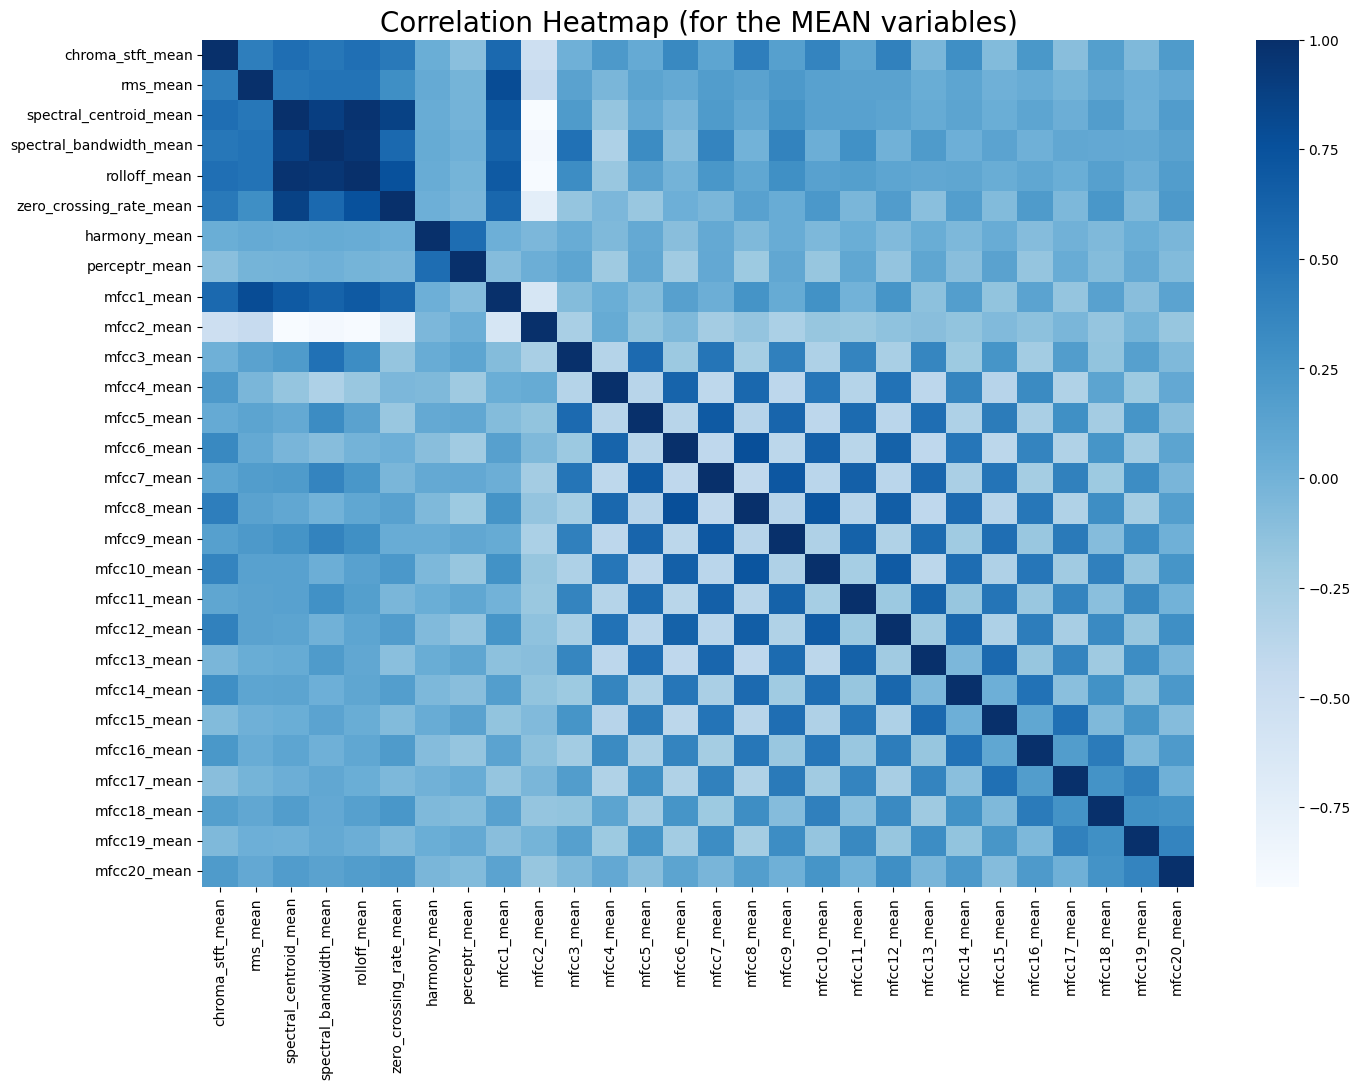

In [390]:
# Heat map for the mean variables
mean_cols = [col for col in data.columns if 'mean' in col]

corr = data[mean_cols].corr()
f, ax = plt.subplots(figsize=(16, 11))

sns.heatmap(corr, cmap = 'Blues')
plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

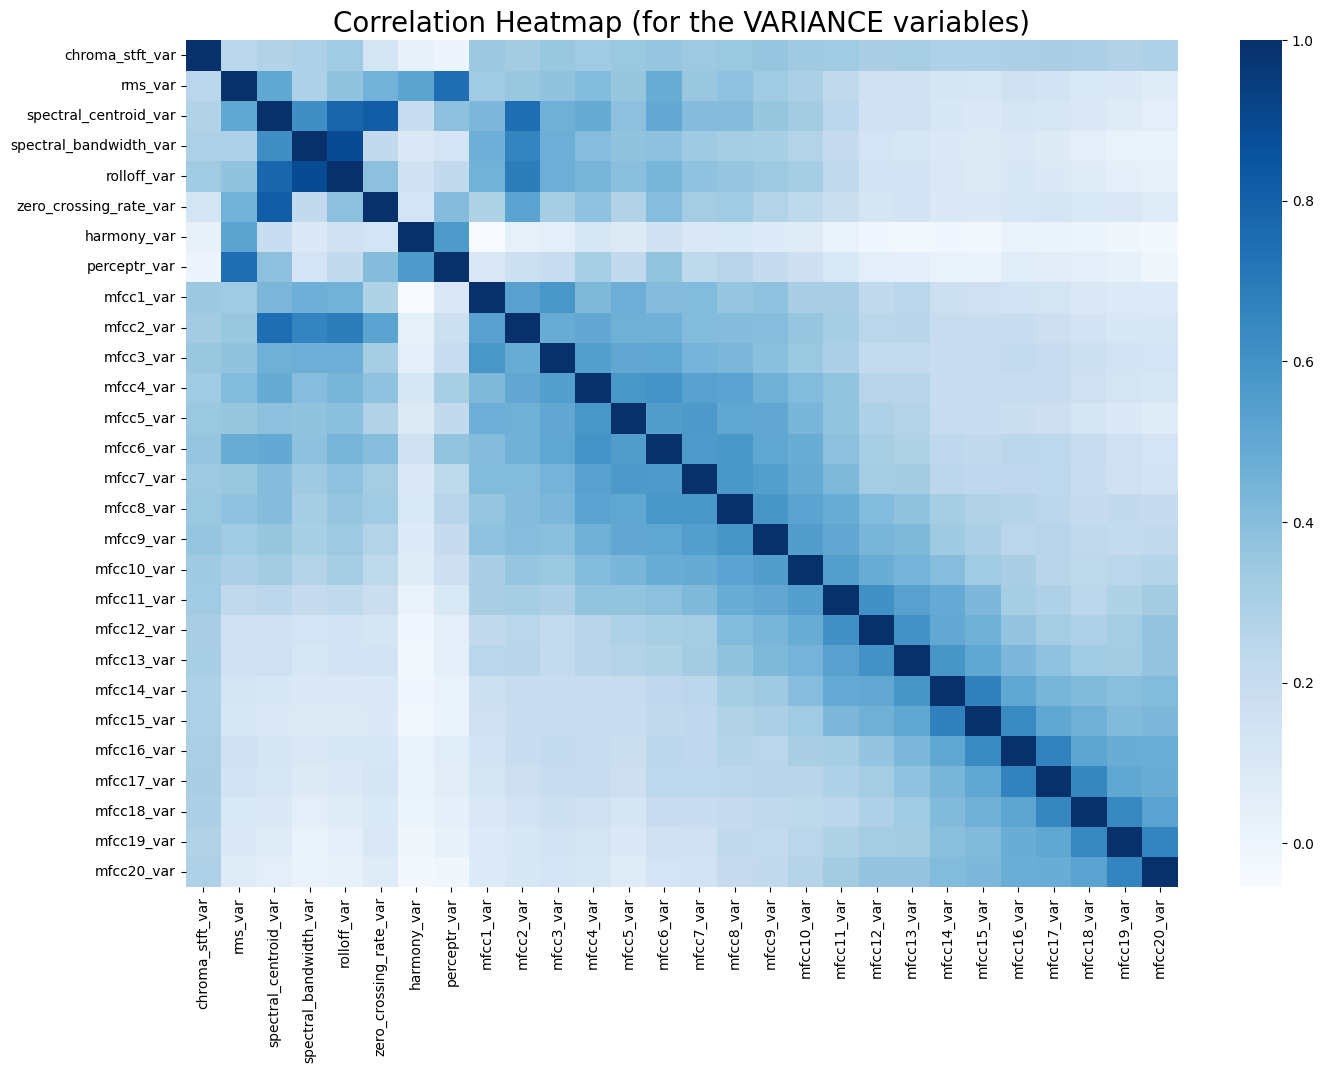

In [391]:
# Heat map for Variance variables
var_cols = [col for col in data.columns if 'var' in col]

corr = data[var_cols].corr()
f, ax = plt.subplots(figsize=(16, 11))

sns.heatmap(corr, cmap = 'Blues')
plt.title('Correlation Heatmap (for the VARIANCE variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

In [392]:
data.drop(['filename','length'], axis = 1, inplace = True)

In [393]:
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [394]:
X = data.iloc[:,:-1]

In [395]:
Y = data.iloc[:,-1]

In [396]:
Y

0       blues
1       blues
2       blues
3       blues
4       blues
        ...  
9985     rock
9986     rock
9987     rock
9988     rock
9989     rock
Name: label, Length: 9990, dtype: object

In [397]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

In [398]:
columns = X.columns

In [399]:
X_scaled = pd.DataFrame(scaled_data, columns = columns)

In [400]:
X_scaled.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,0.070906,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,0.046916,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [401]:
for i in range(1,57):
    pca_dummy = PCA(n_components = i)

    dummy_trans = pca_dummy.fit_transform(X_scaled)

    print("For", i,"number of components Explained Variance Ratio =", pca_dummy.explained_variance_ratio_.cumsum()[i-1])

For 1 number of components Explained Variance Ratio = 0.26745621154231
For 2 number of components Explained Variance Ratio = 0.4498362440131932
For 3 number of components Explained Variance Ratio = 0.5307729242137385
For 4 number of components Explained Variance Ratio = 0.5880377921853404
For 5 number of components Explained Variance Ratio = 0.6380888840571449
For 6 number of components Explained Variance Ratio = 0.67772836729151
For 7 number of components Explained Variance Ratio = 0.7058159036901156
For 8 number of components Explained Variance Ratio = 0.7316685390872284
For 9 number of components Explained Variance Ratio = 0.7525322208953957
For 10 number of components Explained Variance Ratio = 0.7707925305273784
For 11 number of components Explained Variance Ratio = 0.7860533064116344


For 12 number of components Explained Variance Ratio = 0.8006105853267081
For 13 number of components Explained Variance Ratio = 0.8135837867731028
For 14 number of components Explained Variance Ratio = 0.8251068210534458
For 15 number of components Explained Variance Ratio = 0.8358894950608473
For 16 number of components Explained Variance Ratio = 0.8461982961413894
For 17 number of components Explained Variance Ratio = 0.8551872452158099
For 18 number of components Explained Variance Ratio = 0.8638519494530036
For 19 number of components Explained Variance Ratio = 0.8724450851891922
For 20 number of components Explained Variance Ratio = 0.8803594912598564
For 21 number of components Explained Variance Ratio = 0.8883200161959866
For 22 number of components Explained Variance Ratio = 0.895308555880863
For 23 number of components Explained Variance Ratio = 0.9020296127681365
For 24 number of components Explained Variance Ratio = 0.9078233243953862
For 25 number of components Explained V

In [402]:
# 90% of variance can be explained using 24 components
pca = PCA(n_components = 24)
components = pca.fit_transform(X_scaled)

X_pca = pd.DataFrame(components)

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,Y, test_size=0.2, random_state=30)

In [404]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
3464,-0.572951,0.201434,-0.115937,0.239001,0.067306,-0.081842,-0.046213,-0.012499,0.136994,0.256496,...,-0.089308,0.027266,-0.063534,0.074522,-0.000588,0.045399,-0.001698,0.030524,0.031445,-0.126716
8204,-0.157563,-0.215466,0.081860,0.048265,0.101969,-0.004882,-0.022919,0.108853,0.027322,0.165707,...,-0.037492,-0.066404,-0.058330,0.018610,0.140165,-0.010976,-0.016474,-0.013814,-0.011269,0.073389
2420,0.122325,0.149607,-0.227326,-0.005400,-0.043764,-0.243892,0.033651,-0.061178,-0.207363,-0.131768,...,0.027767,0.017207,-0.012311,-0.039158,-0.036686,0.031400,0.081337,-0.043266,0.025576,-0.074835
9438,-0.147923,0.390750,-0.274402,-0.206364,0.160321,0.001108,-0.208726,-0.132182,0.334626,0.285190,...,-0.074562,0.099570,-0.045231,-0.000698,-0.007652,-0.143266,0.075279,0.056523,-0.008044,-0.048304
5079,-0.329471,0.173976,0.158814,-0.371490,-0.074486,0.039215,0.074453,-0.075035,0.092064,0.048383,...,0.016085,-0.055116,0.008729,0.043671,-0.083416,0.065004,-0.026542,-0.053719,0.011361,0.141941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,-0.045763,-0.191241,0.071870,-0.043077,-0.227234,0.251089,-0.115585,-0.082406,0.004646,-0.013646,...,-0.029331,0.142956,-0.012762,0.085899,0.088477,-0.060944,-0.020437,-0.079421,0.057768,0.038754
919,-0.407303,0.067559,-0.035861,-0.175826,-0.011653,0.019909,0.116444,0.009991,0.075607,0.114710,...,-0.018150,0.081287,0.039640,0.049130,-0.011251,-0.020024,0.002657,-0.024065,0.015464,0.009856
500,-0.126057,-0.345201,-0.021588,-0.180416,-0.000471,-0.086997,-0.179253,0.068241,-0.041344,0.060654,...,0.051333,-0.076295,-0.031358,0.072623,0.030445,-0.049194,-0.037228,0.024348,0.036032,-0.060154
4517,0.288444,0.159433,-0.239583,-0.197313,-0.308331,-0.057462,-0.021567,-0.099980,0.090006,-0.061606,...,-0.044550,-0.008776,0.038596,-0.040852,-0.041353,0.026634,0.060043,-0.055806,0.032087,-0.051520


In [405]:
# Importing necessary libraries

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [406]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [407]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid for KNN
param_found_knn = 1

knn_params = {
    'n_neighbors': range(1, 21),  # Considering a range that isn't too broad
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']  # Adding different distance metrics
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', verbose=1)

if not param_found_knn: 
    knn_grid.fit(X_train, y_train)

    # Best parameters and best score
    print("Best parameters for KNN:", knn_grid.best_params_)
    print("Best cross-validation score for KNN:", knn_grid.best_score_)

else:
    knn_grid.best_params_ = {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [408]:
"""Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score for KNN: 0.897649031270326"""


# Training KNN with the best parameters
knn_best = KNeighborsClassifier(**knn_grid.best_params_)
knn_best.fit(X_train, y_train)
y_pred_knn_test = knn_best.predict(X_test)
y_pred_knn_train = knn_best.predict(X_train)

# Evaluation
knn_accuracy_test = accuracy_score(y_test, y_pred_knn_test)
knn_accuracy_train = accuracy_score(y_train, y_pred_knn_train)
knn_report = classification_report(y_test, y_pred_knn_test, output_dict=True)
print("Accuracy using KNN =", knn_accuracy_test)

Accuracy using KNN = 0.9154154154154154


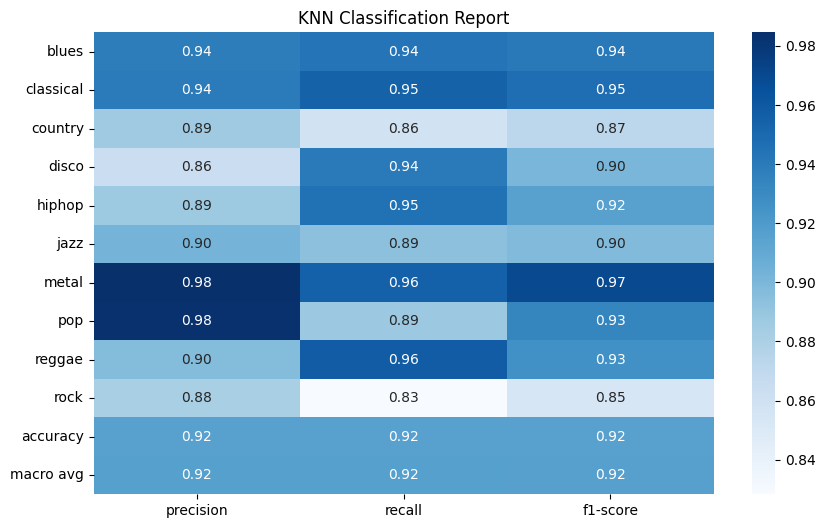

In [409]:
# Transform classification report into DataFrame
knn_report_df = pd.DataFrame(knn_report).transpose()

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(data=knn_report_df.iloc[:-1, :].drop(columns=['support']), annot=True, cmap='Blues', fmt='.2f')
plt.title('KNN Classification Report')
plt.show()

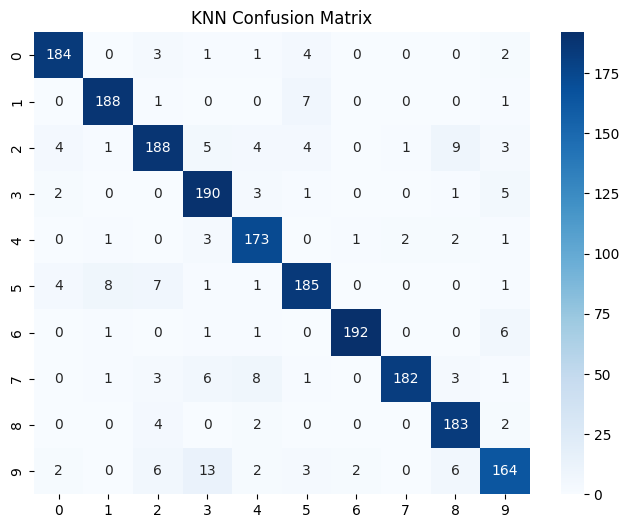

In [410]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()

In [411]:
# Setting up the parameter grid for Decision Trees

param_found_dt = 1
dt_params = {
    'max_depth': range(5, 10),  # Max depth to prevent overfitting
    'min_samples_split': range(2, 10, 2),  # Moderate range for minimum samples split
    'min_samples_leaf': range(1, 5)  # Minimum samples per leaf to ensure generalization
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy', verbose=1)

if not param_found_dt:
    dt_grid.fit(X_train, y_train)

    # Best parameters and best score
    print("Best parameters for Decision Tree:", dt_grid.best_params_)
    print("Best cross-validation score for Decision Tree:", dt_grid.best_score_)

else:
    dt_grid.best_params_ = {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [412]:
"""Best parameters for Decision Tree: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best cross-validation score for Decision Tree: 0.5446695016675785"""


# Training Decision Tree with the best parameters
dt_best = DecisionTreeClassifier(**dt_grid.best_params_, random_state=42)
dt_best.fit(X_train, y_train)
y_pred_dt_test = dt_best.predict(X_test)
y_pred_dt_train = dt_best.predict(X_train)

# Evaluation
dt_accuracy_test = accuracy_score(y_test, y_pred_dt_test)
dt_accuracy_train = accuracy_score(y_train, y_pred_dt_train)
dt_report = classification_report(y_test, y_pred_dt_test, output_dict=True)
print("Accuracy using Decision Tree =", dt_accuracy_test)


Accuracy using Decision Tree = 0.5780780780780781


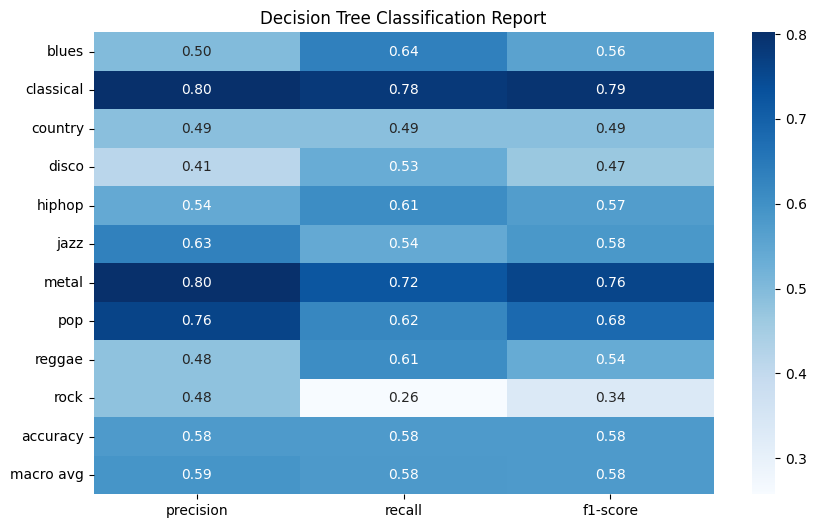

In [413]:
# Transform classification report into DataFrame
dt_report_df = pd.DataFrame(dt_report).transpose()

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(data=dt_report_df.iloc[:-1, :].drop(columns=['support']), annot=True, cmap='Blues', fmt='.2f')
plt.title('Decision Tree Classification Report')
plt.show()


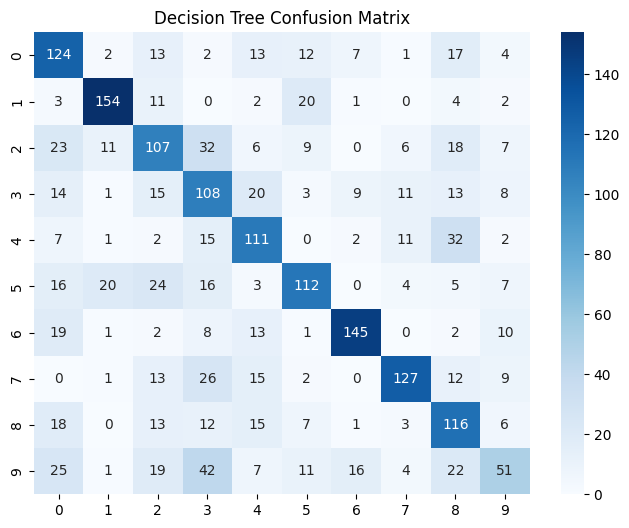

In [414]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [415]:
# Setting up the parameter grid for SVM

param_found_svm = 1
svm_params = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid']  # Different types of kernels
}
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5, scoring='accuracy', verbose=1)
if not param_found_svm:

    svm_grid.fit(X_train, y_train)

    # Best parameters and best score
    print("Best parameters for SVM:", svm_grid.best_params_)
    print("Best cross-validation score for SVM:", svm_grid.best_score_)

else:
    svm_grid.best_params_ = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [416]:
"""Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.8843858919960145"""

# Training SVM with the best parameters
svm_best = SVC(**svm_grid.best_params_, random_state=42)
svm_best.fit(X_train, y_train)
y_pred_svm_test = svm_best.predict(X_test)
y_pred_svm_train = svm_best.predict(X_train)

# Evaluation
svm_accuracy_test = accuracy_score(y_test, y_pred_svm_test)
svm_accuracy_train = accuracy_score(y_train, y_pred_svm_train)
svm_report = classification_report(y_test, y_pred_svm_test, output_dict=True)

print("Accuracy using SVM =", svm_accuracy_test)

Accuracy using SVM = 0.9009009009009009


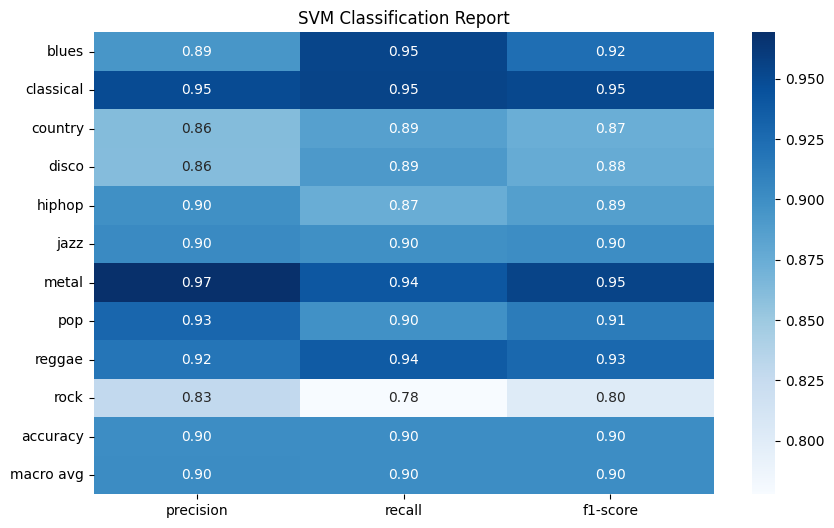

In [417]:
# Transform classification report into DataFrame
svm_report_df = pd.DataFrame(svm_report).transpose()

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(data=svm_report_df.iloc[:-1, :].drop(columns=['support']), annot=True, cmap='Blues', fmt='.2f')
plt.title('SVM Classification Report')
plt.show()


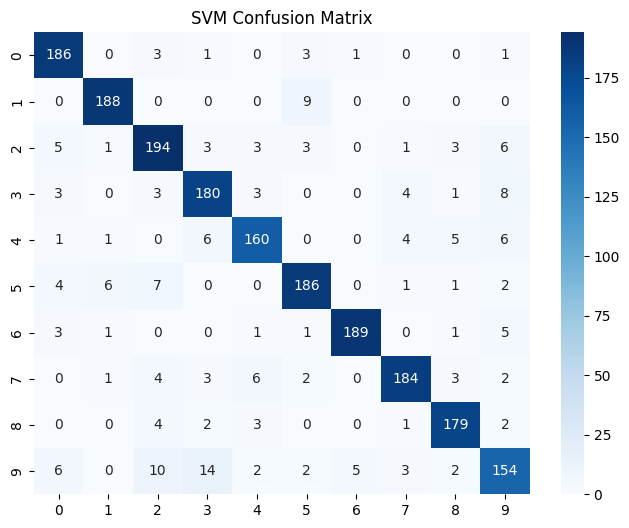

In [418]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

In [419]:
param_found_ada = 1
adaboost_params = {
    'n_estimators': [50, 100, 150, 200], # Number of models to iteratively train
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1] # Weight applied to each classifier at each boosting iteration
}
adaboost_grid = GridSearchCV(AdaBoostClassifier(random_state=42), adaboost_params, cv=5, scoring='accuracy', verbose=1)
if not param_found_ada:
# Setting up the parameter grid for Adaboost
    
    adaboost_grid.fit(X_train, y_train)

    # Best parameters and best score
    print("Best parameters for Adaboost:", adaboost_grid.best_params_)
    print("Best cross-validation score for Adaboost:", adaboost_grid.best_score_)
else:
    adaboost_grid.best_params_ = {'learning_rate': 0.5, 'n_estimators': 50}


In [420]:
"""Best parameters for Adaboost: {'learning_rate': 0.5, 'n_estimators': 50}
Best cross-validation score for Adaboost: 0.3900166014272061"""

# Training Adaboost with the best parameters
adaboost_best = AdaBoostClassifier(**adaboost_grid.best_params_, random_state=42)
adaboost_best.fit(X_train, y_train)
y_pred_adaboost_test = adaboost_best.predict(X_test)
y_pred_adaboost_train = adaboost_best.predict(X_train)

# Evaluation
adaboost_accuracy_test = accuracy_score(y_test, y_pred_adaboost_test)
adaboost_accuracy_train = accuracy_score(y_train, y_pred_adaboost_train)
adaboost_report = classification_report(y_test, y_pred_adaboost_test, output_dict=True)

print("Accuracy using Adaboost =", adaboost_accuracy_test)

Accuracy using Adaboost = 0.3738738738738739


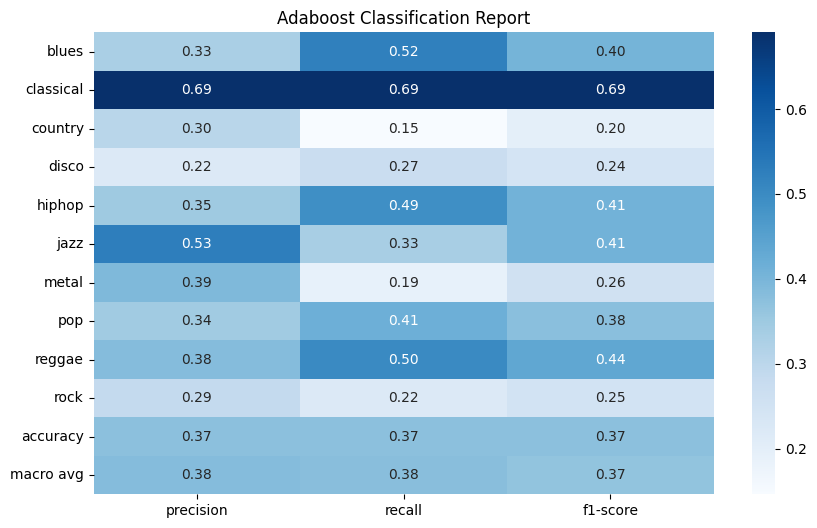

In [421]:
# Transform classification report into DataFrame
adaboost_report_df = pd.DataFrame(adaboost_report).transpose()

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(data=adaboost_report_df.iloc[:-1, :].drop(columns=['support']), annot=True, cmap='Blues', fmt='.2f')
plt.title('Adaboost Classification Report')
plt.show()


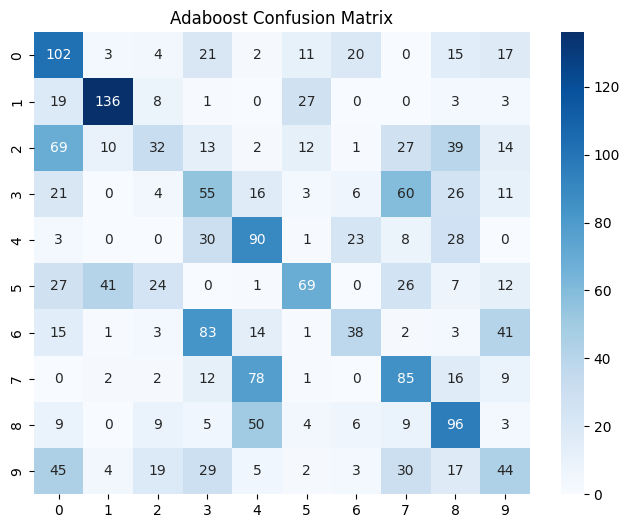

In [422]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost_test), annot=True, fmt='d', cmap='Blues')
plt.title('Adaboost Confusion Matrix')
plt.show()

In [423]:
# Setting up the parameter grid for Logistic Regression
param_found_lr = 1

lr_params = {
    'C': [0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300]  # Maximum number of iterations taken for the solvers to converge
}
lr_grid = GridSearchCV(LogisticRegression(random_state=42), lr_params, cv=5)

if not param_found_ada:
    lr_grid.fit(X_train, y_train)

    # Best parameters and best score
    print("Best parameters for Logistic Regression:", lr_grid.best_params_)
    print("Best cross-validation score for Logistic Regression:", lr_grid.best_score_)

else:
    lr_grid.best_params_= {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}


In [424]:
"""Best parameters for Logistic Regression: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation score for Logistic Regression: 0.6521534500990528"""

# Training Logistic Regression with the best parameters
lr_best = LogisticRegression(**lr_grid.best_params_, random_state=42)
lr_best.fit(X_train, y_train)
y_pred_lr_test = lr_best.predict(X_test)
y_pred_lr_train = lr_best.predict(X_train)

# Evaluation
lr_accuracy_test = accuracy_score(y_test, y_pred_lr_test)
lr_accuracy_train = accuracy_score(y_train, y_pred_lr_train)
lr_report = classification_report(y_test, y_pred_lr_test, output_dict=True)

print("Accuracy using Logistic Regression =", lr_accuracy_test)

Accuracy using Logistic Regression = 0.6611611611611612


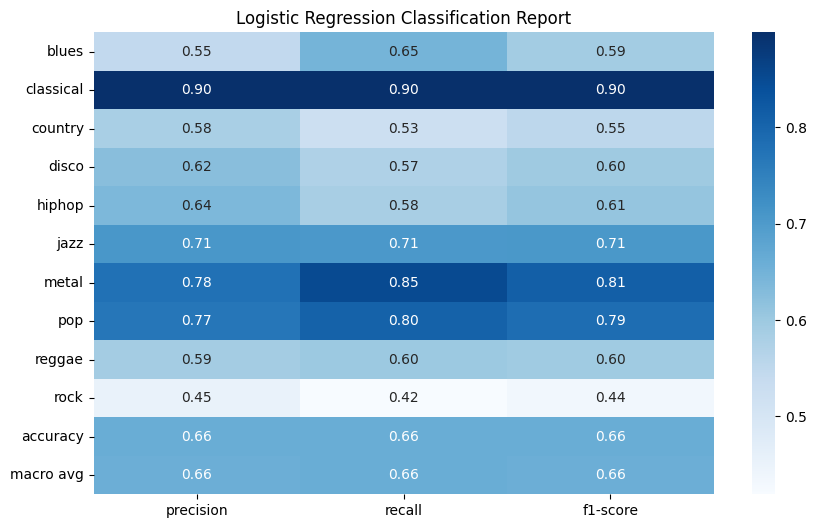

In [425]:
# Transform classification report into DataFrame
lr_report_df = pd.DataFrame(lr_report).transpose()

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(data=lr_report_df.iloc[:-1, :].drop(columns=['support']), annot=True, cmap='Blues', fmt='.2f')
plt.title('Logistic Regression Classification Report')
plt.show()


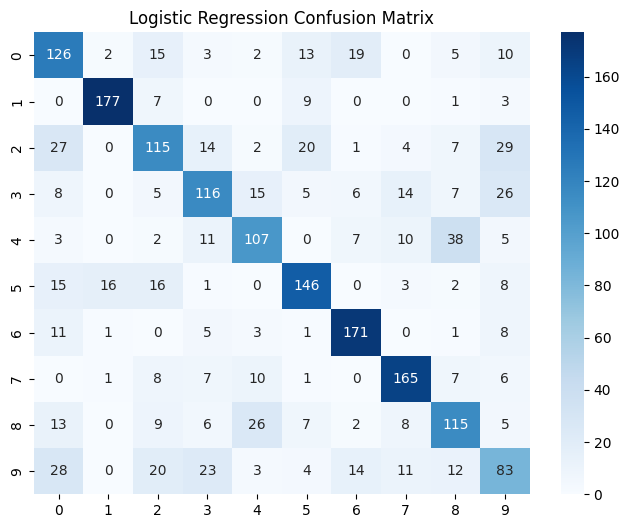

In [426]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [427]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [428]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [429]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [430]:
history = model.fit(X_train, y_train, epochs=70, validation_data=(X_test, y_test), verbose=0)

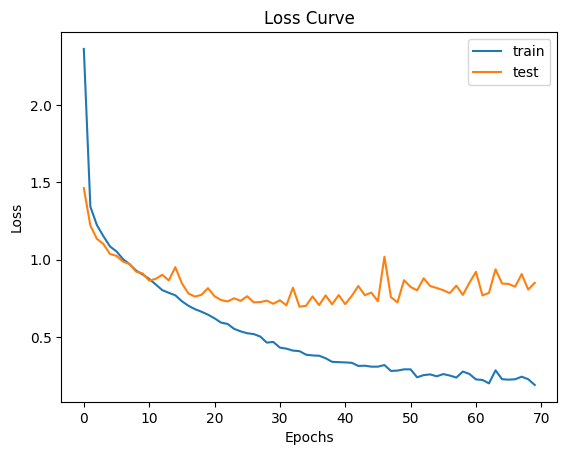

In [431]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

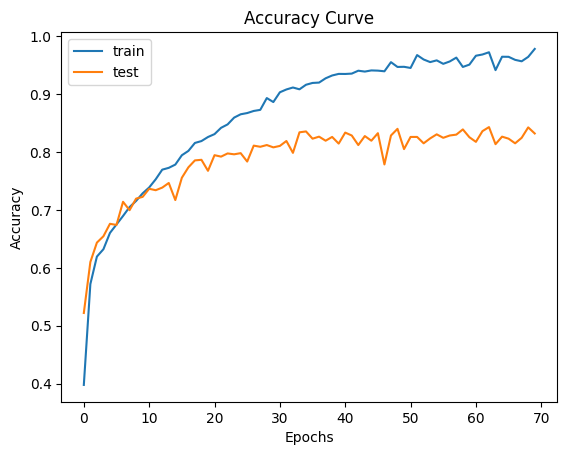

In [432]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [433]:
y_test_pred_ANN = np.argmax(model.predict(X_test), axis=1)
ann_accuracy_test = accuracy_score(y_test_pred_ANN, y_test)
print("Test accuracy using ANN =", ann_accuracy_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test accuracy using ANN = 0.8323323323323323


In [434]:
y_train_pred_ANN = np.argmax(model.predict(X_train), axis=1)
ann_accuracy_train = accuracy_score(y_train_pred_ANN, y_train)
print("Train accuracy using ANN =", ann_accuracy_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train accuracy using ANN = 0.9655905905905906


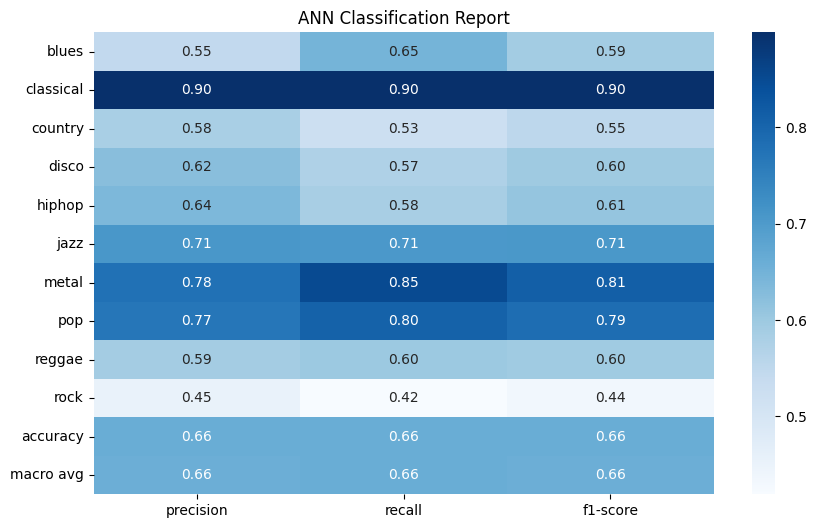

In [435]:
ANN_report = classification_report(y_test, y_test_pred_ANN, output_dict=True)

# Transform classification report into DataFrame
ANN_report_df = pd.DataFrame(ANN_report).transpose()

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(data=lr_report_df.iloc[:-1, :].drop(columns=['support']), annot=True, cmap='Blues', fmt='.2f')
plt.title('ANN Classification Report')
plt.show()

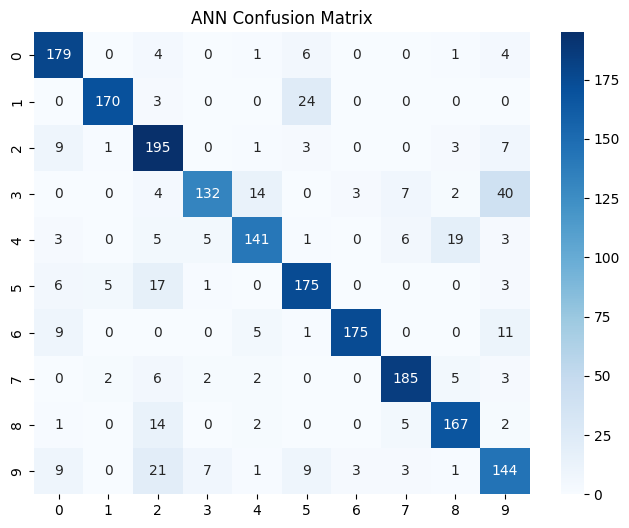

In [436]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred_ANN), annot=True, fmt='d', cmap='Blues')
plt.title('ANN Confusion Matrix')
plt.show()

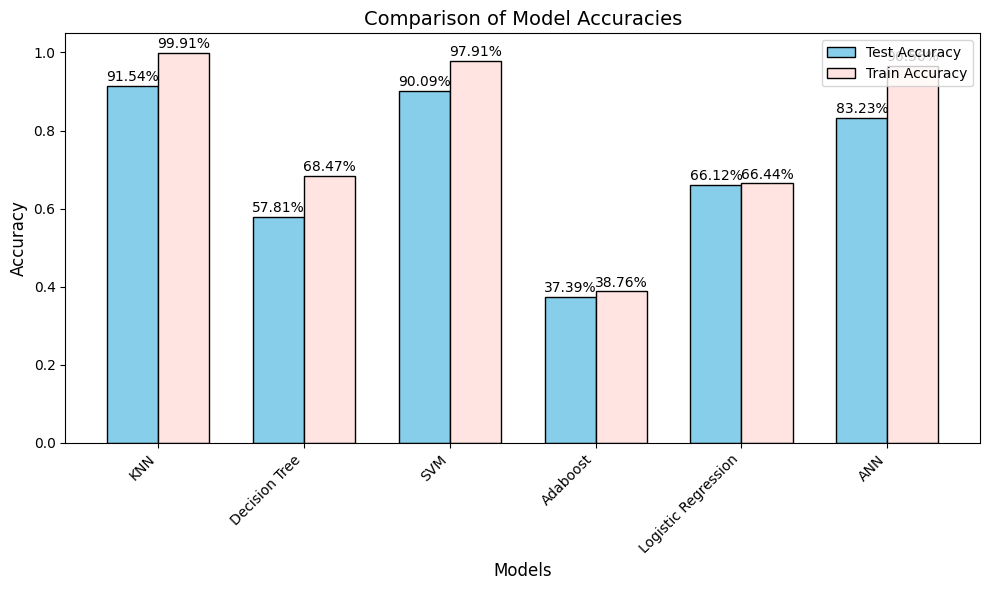

In [437]:
models = ['KNN', 'Decision Tree', 'SVM', 'Adaboost', 'Logistic Regression', 'ANN']

index = np.arange(len(models))
bar_width = 0.35

# Corresponding accuracies
test_accuracies = [knn_accuracy_test, dt_accuracy_test, svm_accuracy_test, adaboost_accuracy_test, lr_accuracy_test, ann_accuracy_test]
train_accuracies = [knn_accuracy_train, dt_accuracy_train, svm_accuracy_train, adaboost_accuracy_train, lr_accuracy_train, ann_accuracy_train]

# Creating the bar chart
plt.figure(figsize=(10, 6))

plt.bar(index, test_accuracies, bar_width, label='Test Accuracy', color="skyblue", edgecolor='black')
plt.bar(index + bar_width, train_accuracies, bar_width, label='Train Accuracy', color="mistyrose", edgecolor='black')

# Adding text labels
for i in range(len(index)):
    plt.text(i, test_accuracies[i] + 0.005, f'{test_accuracies[i]*100:.2f}%', ha='center', va='bottom', fontsize=10)
    plt.text(i + bar_width, train_accuracies[i] + 0.005, f'{train_accuracies[i]*100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Model Accuracies', fontsize=14)
plt.xticks(index + bar_width / 2, models, rotation=45, ha='right', fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()